# Lithium Ion Batteries - RUL Prediction
## ANN
The proposed ANN method is validated using the data collected by Prognostics Center of Excellence at Ames Research Center, NASA. Experiment results show that the proposed ANN method can produce satisfactory RUL prediction results, which will assist the condition based maintenance optimization. 

#### Importing the necessary libraries 
The library numpy is used mainly used for linear algebra. 

The library pandas is used mainly for data processing, reading CSV file I/O (e.g. pd.read_csv).

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)]
Pandas: 1.4.0
Numpy: 1.22.3
Sklearn: 1.0.2
Matplotlib: 3.5.1
Keras: 2.8.0


MatPlotLib Library will be useful for visualisations and to make observations

In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

#### Reading Dataset
Our main dataset is a collective aggragation of various tuples from multiple .mat datasets provided by NASA. 
The attributes of all the data are uniform. 
Removal of unnecessary labels is done later.

In [3]:
dataset = pd.read_csv('Input n Capacity.csv')
dataset = dataset.drop(labels=['SampleId'], axis=1)

#### The contesting attributes
There a total of 6 attributes that are taken into consideration for the mode. Out of these 6 attributes, one label is taken as a target value.

In [4]:
print( 'Shape of DataFrame: {}'.format(dataset.shape))
print (dataset.loc[1])

Shape of DataFrame: (636, 6)
Cycle                      0.000000
Time Measured(Sec)      3690.234000
Voltage Measured(V)        2.475768
Current Measured          -2.009436
Temperature Measured      39.162987
Capacity(Ah)               2.035338
Name: 1, dtype: float64


In [5]:
dataset.loc[280:]

,Cycle,Time Measured(Sec),Voltage Measured(V),Current Measured,Temperature Measured,Capacity(Ah)
280,70,3148.829,3.484004,-0.000984,36.466500,1.622125
281,70,3148.829,3.468023,-0.001288,34.587894,1.530157
282,70,3148.829,3.238140,-0.000266,39.408643,1.667437
283,70,3045.187,3.414321,0.005711,34.697069,1.533426
284,71,3149.094,3.508463,-0.003644,36.017069,1.611326
...,...,...,...,...,...,...
631,166,2802.016,3.693059,-0.001245,32.371097,1.174975
632,166,2802.016,3.372148,-0.001992,38.470677,1.421787
633,167,2820.390,3.589937,-0.000583,34.405920,1.325079
634,167,2820.390,3.691809,-0.003127,32.192324,1.185675


In [6]:
data = dataset[~dataset.isin(['?'])]
data.loc[280:]

,Cycle,Time Measured(Sec),Voltage Measured(V),Current Measured,Temperature Measured,Capacity(Ah)
280,70,3148.829,3.484004,-0.000984,36.466500,1.622125
281,70,3148.829,3.468023,-0.001288,34.587894,1.530157
282,70,3148.829,3.238140,-0.000266,39.408643,1.667437
283,70,3045.187,3.414321,0.005711,34.697069,1.533426
284,71,3149.094,3.508463,-0.003644,36.017069,1.611326
...,...,...,...,...,...,...
631,166,2802.016,3.693059,-0.001245,32.371097,1.174975
632,166,2802.016,3.372148,-0.001992,38.470677,1.421787
633,167,2820.390,3.589937,-0.000583,34.405920,1.325079
634,167,2820.390,3.691809,-0.003127,32.192324,1.185675


Drowpping the rows / columns having null values

In [7]:
data = data.dropna(axis=0)
data.loc[280:]

,Cycle,Time Measured(Sec),Voltage Measured(V),Current Measured,Temperature Measured,Capacity(Ah)
280,70,3148.829,3.484004,-0.000984,36.466500,1.622125
281,70,3148.829,3.468023,-0.001288,34.587894,1.530157
282,70,3148.829,3.238140,-0.000266,39.408643,1.667437
283,70,3045.187,3.414321,0.005711,34.697069,1.533426
284,71,3149.094,3.508463,-0.003644,36.017069,1.611326
...,...,...,...,...,...,...
631,166,2802.016,3.693059,-0.001245,32.371097,1.174975
632,166,2802.016,3.372148,-0.001992,38.470677,1.421787
633,167,2820.390,3.589937,-0.000583,34.405920,1.325079
634,167,2820.390,3.691809,-0.003127,32.192324,1.185675


In [8]:
print(data.shape)
print(data.dtypes)

(636, 6)
Cycle                     int64
Time Measured(Sec)      float64
Voltage Measured(V)     float64
Current Measured        float64
Temperature Measured    float64
Capacity(Ah)            float64
dtype: object


In [9]:
data.keys()
data.shape

(636, 6)

In [10]:
data = data.apply(pd.to_numeric)
data.dtypes

Cycle                     int64
Time Measured(Sec)      float64
Voltage Measured(V)     float64
Current Measured        float64
Temperature Measured    float64
Capacity(Ah)            float64
dtype: object

In [11]:
data.describe()

,Cycle,Time Measured(Sec),Voltage Measured(V),Current Measured,Temperature Measured,Capacity(Ah)
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,79.764151,3116.977701,3.297086,-0.171153,36.318064,1.581652
std,47.137103,242.197224,0.382406,0.556974,2.090171,0.198765
min,0.000000,2742.843000,1.813269,-2.012015,32.113473,1.153818
25%,39.000000,2891.996250,3.260587,-0.003576,34.639503,1.421123
50%,79.000000,3084.281000,3.397571,-0.001903,35.808964,1.559695
75%,119.000000,3311.828000,3.529257,-0.000338,38.447301,1.763486
max,167.000000,3690.234000,3.697170,0.009113,41.049942,2.035338


Plotting the graphs that showcase the range of values belonging to each attribute

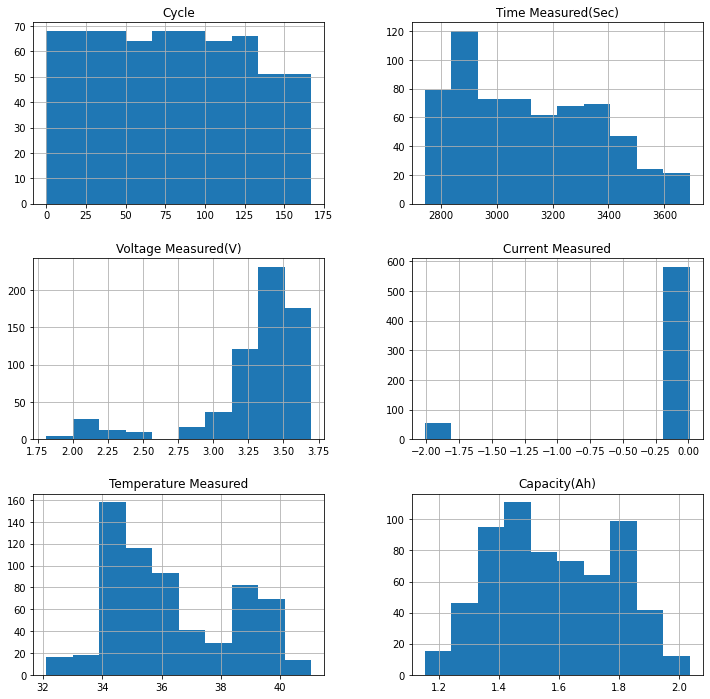

In [12]:
data.hist(figsize = (12, 12))
plt.show()

<AxesSubplot:title={'center':'Features Standard Deviation'}>

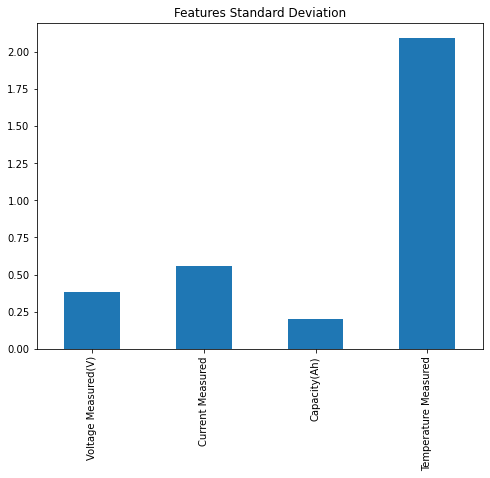

In [13]:
features=["Voltage Measured(V)","Current Measured","Capacity(Ah)","Temperature Measured"]
data[features].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")

#### Splitting the main dataset
X involves all the measurement attributes

y includes the values of the target attribute

In [14]:
X = np.array(data.iloc[:,0:5].values)
y = np.array(data.iloc[:,5].values)

In [15]:
X

array([[ 0.00000000e+00,  3.69023400e+03,  3.27716998e+00,
        -6.52835100e-03,  3.42308528e+01],
       [ 0.00000000e+00,  3.69023400e+03,  2.47576776e+00,
        -2.00943589e+00,  3.91629865e+01],
       [ 0.00000000e+00,  3.69023400e+03,  3.06211271e+00,
        -1.43329900e-03,  3.73384785e+01],
       ...,
       [ 1.67000000e+02,  2.82039000e+03,  3.58993739e+00,
        -5.83347000e-04,  3.44059205e+01],
       [ 1.67000000e+02,  2.82039000e+03,  3.69180898e+00,
        -3.12712900e-03,  3.21923241e+01],
       [ 1.67000000e+02,  2.82039000e+03,  3.38385665e+00,
        -9.84538000e-04,  3.78516025e+01]])

In [16]:
y

array([1.85648742, 2.03533759, 1.89105229, 1.85500452, 1.84632725,
       2.02514025, 1.88063703, 1.84319553, 1.83534919, 2.01332637,
       1.88066267, 1.83960184, 1.83526253, 2.01328467, 1.8807709 ,
       1.8306736 , 1.83464551, 2.00052834, 1.87945087, 1.83270021,
       1.83566166, 2.01389908, 1.88070035, 1.82852889, 1.83514614,
       2.01310111, 1.87993525, 1.82120119, 1.82575679, 1.96878983,
       1.88150881, 1.81517001, 1.82477385, 1.96816618, 1.86969079,
       1.80429805, 1.82461327, 1.95723079, 1.87005238, 1.82310023,
       1.82461955, 1.94559915, 1.87004424, 1.81212535, 1.81420194,
       1.9347505 , 1.8596519 , 1.80469164, 1.81375216, 1.92327995,
       1.85907466, 1.79084435, 1.81344049, 1.91188993, 1.85900846,
       1.78347072, 1.802598  , 1.90106671, 1.85936226, 1.78093861,
       1.8021069 , 1.889199  , 1.85873555, 1.77120904, 1.8025795 ,
       1.87827837, 1.84781729, 1.7686304 , 1.80306831, 1.86756972,
       1.84852529, 1.75363048, 1.80277763, 1.86758926, 1.84837

#### Levelling the attributes' values
As seen in X, the numerical values vary in great lengths. Hence it's necessary to bring these values obeying a common range. The mean and standard deviation of the data is calculated.

The mean is deducted from X

The standard deviation is used to divide X

In [17]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [18]:
mean
std

array([ 47.10003109, 242.00674287,   0.38210518,   0.55653546,
         2.08852755])

#### Creating X and y datasets for training

In [19]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.3)

In [20]:
X_test.shape

(191, 5)

Converting the y vectors (integers) to binary matrix.

In [21]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(445, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [22]:
X_train[0]

array([ 0.06870163, -0.12955301,  0.0497592 ,  0.30729039,  1.381131  ])

#### Creating a model
Sequential provides training and inference features on this model

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=5, kernel_initializer='uniform', activation='tanh'))
    model.add(Dropout(0.15))
    model.add(Dense(7, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(3,kernel_initializer='uniform', activation='sigmoid'))
    
    # compile model
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_absolute_error','accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 24        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
None


#### Fitting the proposed model

In [24]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10, batch_size=1)

Epoch 1/10
445/445 [==============================] - 11s 6ms/step - loss: 0.2107 - mean_absolute_error: 0.4583 - accuracy: 0.9865 - val_loss: 0.1754 - val_mean_absolute_error: 0.4187 - val_accuracy: 0.9948
Epoch 2/10
445/445 [==============================] - 2s 5ms/step - loss: 0.1508 - mean_absolute_error: 0.3873 - accuracy: 0.9865 - val_loss: 0.1272 - val_mean_absolute_error: 0.3562 - val_accuracy: 0.9948
Epoch 3/10
445/445 [==============================] - 2s 4ms/step - loss: 0.1125 - mean_absolute_error: 0.3335 - accuracy: 0.9865 - val_loss: 0.0962 - val_mean_absolute_error: 0.3093 - val_accuracy: 0.9948
Epoch 4/10
445/445 [==============================] - 2s 4ms/step - loss: 0.0875 - mean_absolute_error: 0.2930 - accuracy: 0.9865 - val_loss: 0.0755 - val_mean_absolute_error: 0.2735 - val_accuracy: 0.9948
Epoch 5/10
445/445 [==============================] - 2s 3ms/step - loss: 0.0706 - mean_absolute_error: 0.2617 - accuracy: 0.9865 - val_loss: 0.0613 - val_mean_absolute_error:

In [25]:
history.history

{'loss': [0.2106662094593048,
  0.15080635249614716,
  0.11245765537023544,
  0.08751964569091797,
  0.07064806669950485,
  0.0587754100561142,
  0.05014600604772568,
  0.04354841634631157,
  0.03850608319044113,
  0.034466881304979324],
 'mean_absolute_error': [0.458296000957489,
  0.38730376958847046,
  0.3335109055042267,
  0.2929958999156952,
  0.2616851329803467,
  0.236993208527565,
  0.21729083359241486,
  0.20055419206619263,
  0.1867244392633438,
  0.17491520941257477],
 'accuracy': [0.9865168333053589,
  0.9865168333053589,
  0.9865168333053589,
  0.9865168333053589,
  0.9865168333053589,
  0.9865168333053589,
  0.9865168333053589,
  0.9865168333053589,
  0.9865168333053589,
  0.9865168333053589],
 'val_loss': [0.17540042102336884,
  0.12718963623046875,
  0.09615728259086609,
  0.0755392387509346,
  0.06126789376139641,
  0.050982631742954254,
  0.04330302029848099,
  0.0373942069709301,
  0.032739005982875824,
  0.028983628377318382],
 'val_mean_absolute_error': [0.41869622

#### Plotting the obtained and predicted Mean Absolute Error (MAE)

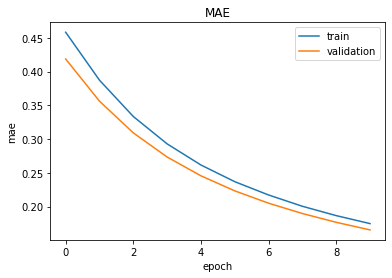

In [26]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#### Plotting the obtained and predicted Accuracy

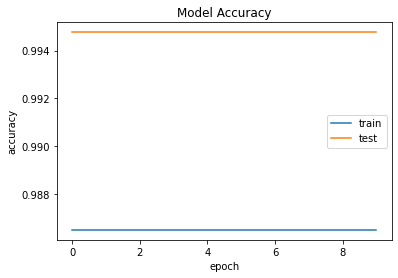

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

#### Plotting the obtained and predicted Mean Squared Error (MSE)

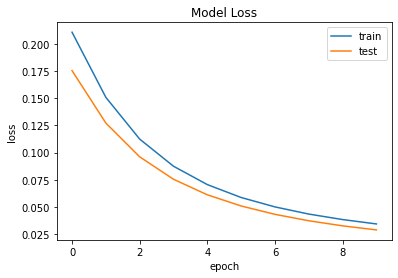

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

#### Plotting the graph of Cycle Vs Capacity

Text(0.5, 1.0, 'RUL Prediction')

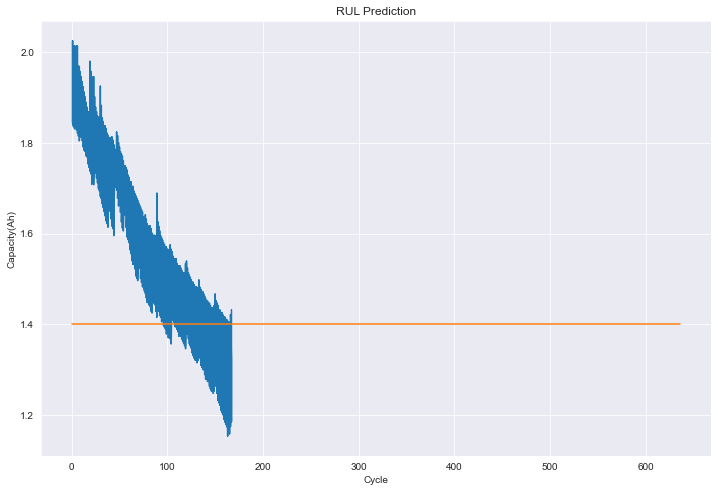

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = data.loc[(data['Cycle']>=1),['Cycle','Capacity(Ah)']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['Cycle'], plot_df['Capacity(Ah)'])
#Draw threshold
plt.plot([0.,len(data)], [1.4, 1.4])
plt.ylabel('Capacity(Ah)')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Cycle')
plt.title('RUL Prediction')

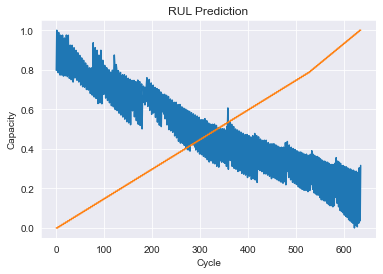

(array([68., 68., 68., 64., 68., 68., 64., 66., 51., 51.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

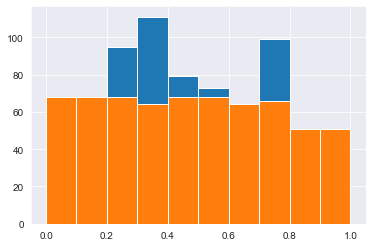

In [16]:
capacity = np.array(data.iloc[:,5].values)
cycle = np.array(data.iloc[:,0].values)
normalizedCycle = (cycle-min(cycle))/(max(cycle)-min(cycle))
normalizedCapacity = (capacity-min(capacity)) / (max(capacity) - min(capacity))
plt.plot(normalizedCapacity)
plt.plot(normalizedCycle)
plt.title('RUL Prediction')
plt.ylabel('Capacity')
plt.xlabel('Cycle')
plt.show()
plt.hist(normalizedCapacity, bins=10)
plt.hist(normalizedCycle, bins=10)

#### Plotting the graph of Time Measured Vs Voltage Measured for all cycles

Text(0.5, 1.0, 'Discharge')

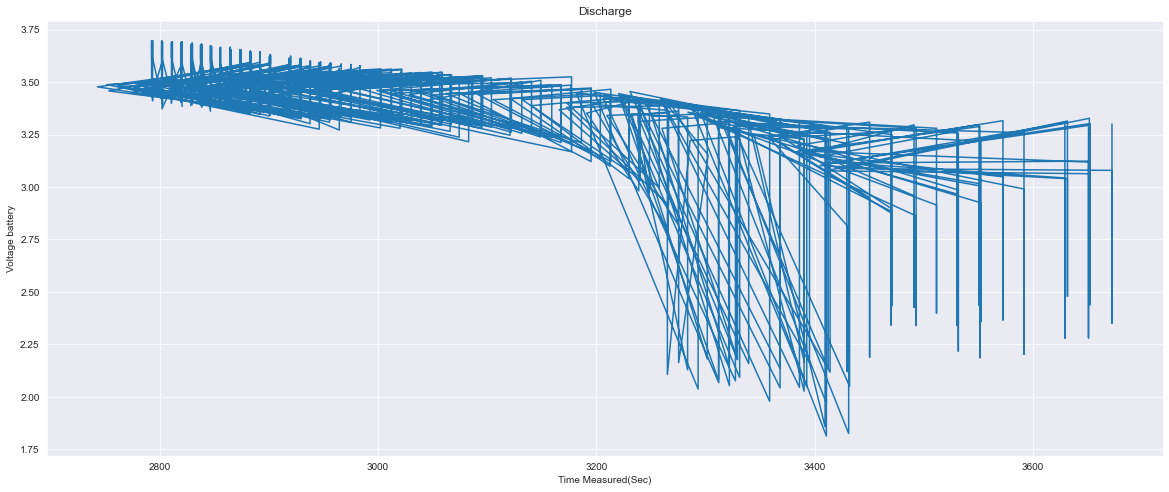

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = data.loc[(data['Cycle']>=1),['Time Measured(Sec)','Voltage Measured(V)']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['Time Measured(Sec)'], plot_df['Voltage Measured(V)'])
plt.ylabel('Voltage battery')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Time Measured(Sec)')
plt.title('Discharge')

#### Plotting the observed relationship between Temperature Measured, Voltage Measured and Current Measured

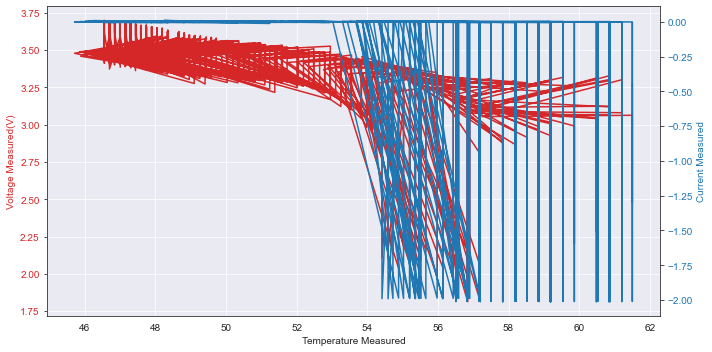

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax1 = plt.subplots()
sns.set_style("white")
plot_df= data.loc[(data['Cycle']==1),['Temperature Measured','Current Measured']]
#plt.plot([126, 127], color="black")
plot_df1 = data.loc[(data['Cycle']==1),['Temperature Measured','Voltage Measured(V)']]

color = 'tab:red'
ax1.set_xlabel('Temperature Measured')
ax1.set_ylabel('Voltage Measured(V)', color=color)
ax1.plot(data['Time Measured(Sec)']/60, data['Voltage Measured(V)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Current Measured', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Time Measured(Sec)']/60, data['Current Measured'],'-', color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.set_size_inches(10, 5)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
# vertical black line split the graph between charge and discharge operation.